# New Section

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:540: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:545: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


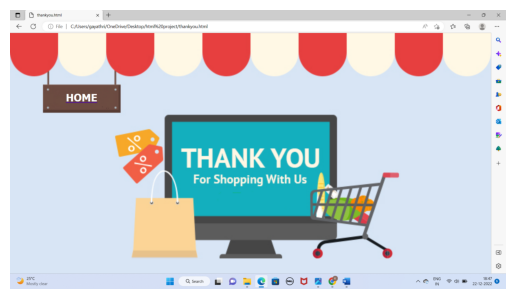

Generated Caption: This is an image of a computer screen with a shopping cart on it


In [ ]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import os
import matplotlib.pyplot as plt

# Check if GPU is available and use it
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the processor and the model
processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-large")
model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-large").to(device)

# Specify the path to your image
image_path = "/content/2022-12-22 (42).png"

# Check if the image exists
if not os.path.exists(image_path):
    print(f"Error: The image at {image_path} does not exist.")
else:
    # Load the image
    image = Image.open(image_path)

    # Preprocess the image
    inputs = processor(images=image, return_tensors="pt").to(device)

    # Generate caption with optimized parameters for a single, high-quality output
    outputs = model.generate(
        **inputs,
        max_length=60,         # Increased max_length for longer captions
        num_beams=15,          # Increased num_beams for better quality
        num_return_sequences=1, # Generate a single caption
        temperature=0.7,       # Adjust temperature for more diverse outputs
        top_p=0.9,             # Use nucleus sampling
        early_stopping=True    # Stop when all beams have finished
    )

    # Decode the generated caption
    caption = processor.decode(outputs[0], skip_special_tokens=True)

    # Post-process caption (e.g., capitalize first letter)
    caption = caption.capitalize()

    # Display the image and caption
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    print(f"Generated Caption: {caption}")